# Исследование для сервиса проката самокатов GoFast

## Описание данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

**без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках.\
Пользователи — `users_go.csv`
- `user_id`	уникальный идентификатор пользователя
- `name`	имя пользователя
- `age`	возраст
- `city`	город
- `subscription_type`	тип подписки (free, ultra)

Поездки — `rides_go.csv`
- `user_id`	уникальный идентификатор пользователя
- `distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date`	дата совершения поездки


Подписки — `subscriptions_go.csv`
- `subscription_type`	тип подписки
- `minute_price`	стоимость одной минуты поездки по данной подписке
- `start_ride_price`	стоимость начала поездки
- `subscription_fee`	стоимость ежемесячного платежа

## Загрузка данных

**Загружаем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import binom, norm


**Открываем данные**

In [2]:
try: 
    users_go = pd.read_csv('/datasets/users_go.csv')
    riders_go = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users_go = pd.read_csv('c:\\python\\datasets\\users_go.csv')
    riders_go = pd.read_csv('c:\\python\\datasets\\rides_go.csv')
    subscriptions_go = pd.read_csv('c:\\python\\datasets\\subscriptions_go.csv')

Создадим функцию для вывода основной информации о датафрейме

In [3]:
def information_data(data):
    display ('Первые десять строк датафрейма:')
    display (data.head(10))
    display('Основная информация о датафрейме:')
    display(data.info())
    display('Количество пропусков:')
    display(data.isna().sum())
    display('Количество дубликатов:')
    display(data.duplicated().sum())


Ознакомимся с данными, представленными в датафрейме о пользователях `users_go`:

In [4]:
information_data(users_go)

'Первые десять строк датафрейма:'

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

'Количество пропусков:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

'Количество дубликатов:'

31

Ознакомимся с данными, представленными в датафрейме о поездках `riders_go`:

In [5]:
information_data(riders_go)

'Первые десять строк датафрейма:'

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

'Количество пропусков:'

user_id     0
distance    0
duration    0
date        0
dtype: int64

'Количество дубликатов:'

0

Ознакомимся с данными, представленными в датафрейме о подписках `subscriptions_go`:

In [6]:
information_data(subscriptions_go)

'Первые десять строк датафрейма:'

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

'Количество пропусков:'

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Количество дубликатов:'

0

## Вывод

**Таким образом для проведения исследования нам представлено 3 различных датафрейма, которые содержат информацию о:**

- пользователях сервиса 
- поездках
- подписках

**В результате первичного ознакомления с данными можно сказать следующее:**
- датафрейм `users_go` содержит 1565 строк в 5 столбцах:

1. `user_id`	уникальный идентификатор пользователя
2. `name`	имя пользователя
3. `age`	возраст
4. `city`	город
5.  `subscription_type`	тип подписки (free, ultra)\
Не содержит пропусков и имеет 31 дублирующуюся строку. Дубликаты на этапе предобработки данных мы удалим. 

- датафрейм `riders_go` содержит 18068 строк в 4 столбцах:

1. `user_id`	уникальный идентификатор пользователя
2. `distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)
3. `duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
4. `date`	дата совершения поездки\
Не содержит пропусков и дубликатов. На этапе предварительной обработки данных тип данных столбца `date` будет приведен к `datetime64` для удобства дальнейшей работы. 

- датафрейм `subscriptions_go` содержит информацию о тарифах с различными типами подписки, имеет 2 строки и 4 столбца:

1. `subscription_type`	тип подписки
2. `minute_price`	стоимость одной минуты поездки по данной подписке
3. `start_ride_price`	стоимость начала поездки
4. `subscription_fee`	стоимость ежемесячного платежа\
Пропусков и дубликатов нет. 


# Предобработка данных

## Изменение типов данных

Изменим тип данных столбца `date` в датафрейме `riders_go`:

In [7]:
riders_go['date'] = pd.to_datetime(riders_go['date'], format='%Y-%m-%d')

In [8]:
riders_go.info() # проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


## Добавление нового столбца

**Добавим в датафрейм столбец с месяцем совершения поездки. Для этого используем метод assign.**

In [9]:
riders_go = riders_go.assign(month = riders_go['date'].dt.month)

In [10]:
riders_go.info() # проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


**Проверим, за какой период имеются данные:**

In [11]:
print('В представленных данных имеется информация о поездках за период с',\
      riders_go['date'].dt.date.min(), 'по', riders_go['date'].dt.date.max())

В представленных данных имеется информация о поездках за период с 2021-01-01 по 2021-12-30


**Посмотрим на дубликаты в таблице `users_go` и убедимся, что можно смело их удалить.**

In [12]:
users_go[users_go.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


**Удаляем дубликаты и проверяем результат:**

In [13]:
users_go.drop_duplicates(inplace=True)

In [14]:
information_data(users_go)

'Первые десять строк датафрейма:'

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


None

'Количество пропусков:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

'Количество дубликатов:'

0

## Вывод

На этапе предварительной обработки данных был приведен тип данных столбца `data` датафрейма `riders_go` к `datetime64`, в данный датафрейм был добавлен столбец с месяцем совершения поездки. Это пригодится в ходе дальнейшего анализа. 
Удалили строки-дубликаты в датафрейме `users_go`.

#  Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

## частота встречаемости городов

Посмотрим на уникальные значения столбца `city` в датафрейме `users_go`, отсортируем их по убыванию частоты.

In [15]:
users_go['city'].value_counts(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

**Для наглядности построим график. Наибольшей популярностью сервис пользуется в Пятигорске и Екатеринбурге — пользователей из этих городов зарегистрировано более 200.**

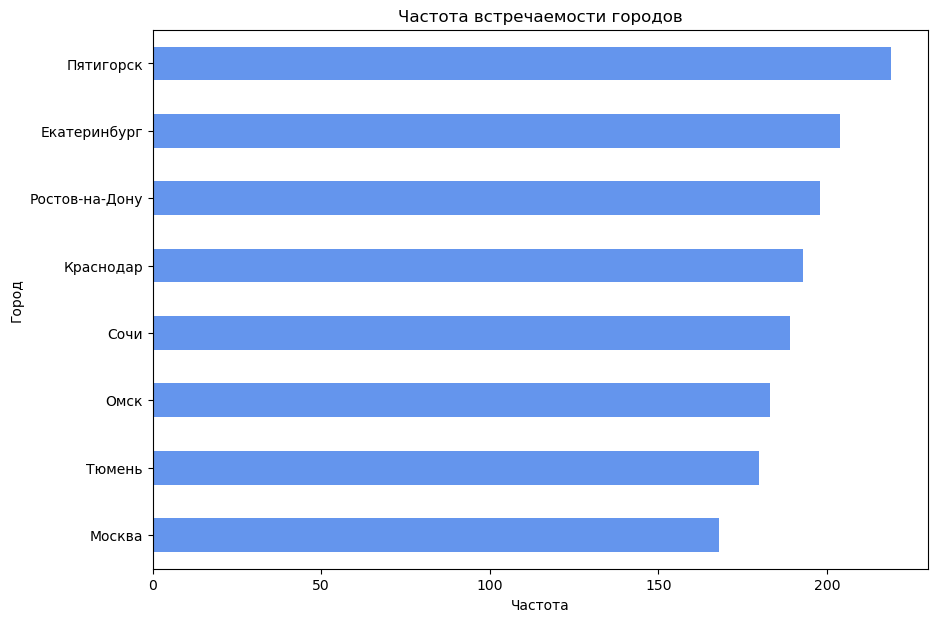

In [16]:
plt.figure(figsize=(15,10))

users_go.groupby('city')['city'].count().\
sort_values().plot(kind='barh', figsize=(10, 7), color='cornflowerblue')  

plt.title('Частота встречаемости городов')
plt.xlabel('Частота')
plt.ylabel('Город')
plt.show()

## соотношение количества пользователей с подпиской и без подписки


In [17]:
users_go['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [18]:
print('Среди пользователей сервиса имеют платную подписку:', 
      round(len(users_go[users_go['subscription_type'] == 'ultra']) / 
            len(users_go) * 100, 1), '%')
print('Пользователей сервиса пользуются бесплатной версией:', 
      round(len(users_go[users_go['subscription_type'] == 'free']) / 
            len(users_go) * 100, 1), '%')

Среди пользователей сервиса имеют платную подписку: 45.6 %
Пользователей сервиса пользуются бесплатной версией: 54.4 %


Для наглядности построим круговую диаграмму.

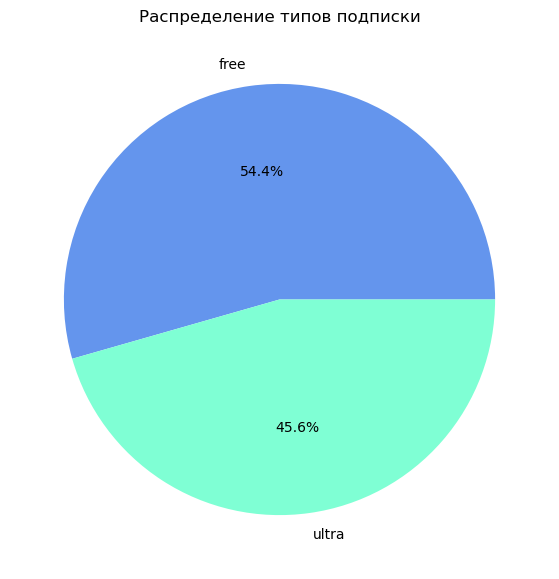

In [19]:
plt.figure(figsize=(10,7))

users_go['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                 colors=['cornflowerblue', 'aquamarine'])

plt.title('Распределение типов подписки')
plt.ylabel('')
plt.show();

**Таким образом немного меньше половины пользователей имеют подписку ultra.**

## возраст пользователей


Посмотрим основные статистические характеристики столбца с возрастом пользователей, а потом построим гистограмму:

In [20]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

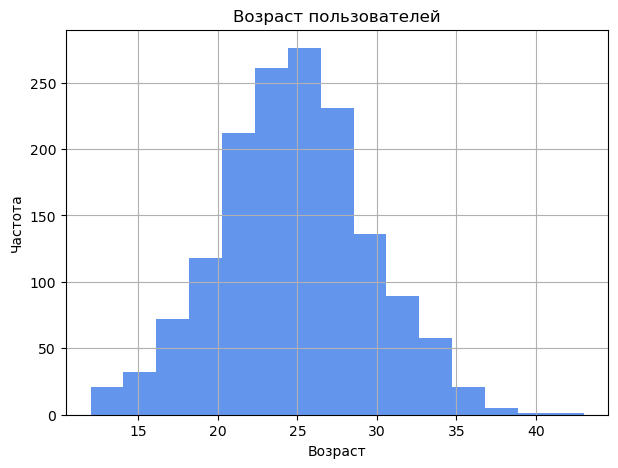

In [21]:
plt.figure(figsize=(10, 7))
users_go['age'].hist(color='cornflowerblue', figsize=(7, 5), bins=15)

plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show();

**Видим, что в основном пользователями сервиса являются молодые люди в возрасте от 22 до 28 лет. Необычными являются значения больше 36 и меньше 13 лет.**

## расстояние, которое пользователь преодолел за одну поездку


**Построим гистограмму, чтобы узнать, какое расстояние пользователи преодолевают за одну поездку.**

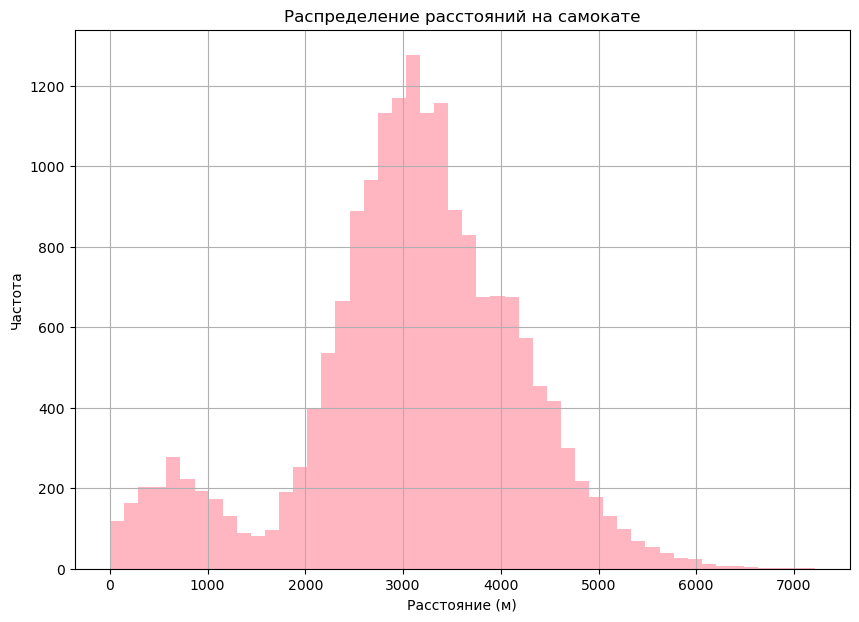

In [22]:
plt.figure(figsize=(10, 7))
riders_go['distance'].hist(bins=50, color='lightpink')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.title('Распределение расстояний на самокате');


**Гистограмма "распределение расстояний на самокате" показывает, что расстояние поездок варьируется от 0 до 7000 метров. Большинство поездок находятся в диапазоне от 2000 до 4000 м, с пиком около 3000 м. Это означает, что наиболее часто встречающееся расстояние, которое пользователи преодолевают за одну поездку на самокате, составляет около 3000 м. Также наблюдается дополнительный пик в районе 600 м. Это может указывать на некоторое количество непродолжительных поездок. Возможно, это может быть связано с обнаруженной после старта поездки неисправностью самоката, а, возможно, непродолжительные поездки также пользуются спросом пользователей сервиса.**

## продолжительность поездок

Построим гистограмму для визуализации продолжительности поездок на самокате

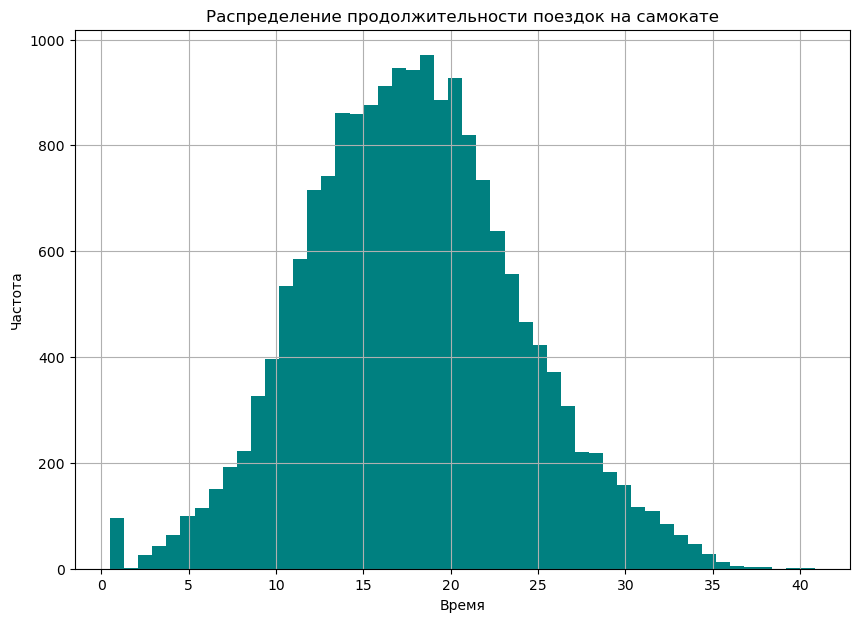

In [23]:
plt.figure(figsize=(10, 7))
riders_go['duration'].hist(bins=50, color='teal');
plt.xlabel('Время')
plt.ylabel('Частота')
plt.title('Распределение продолжительности поездок на самокате');

**На гистограмме видим, что продолжительность поездок варьируется от 0 до 40 минут. Большинство поездок находятся в диапазоне от примерно 15 до 25 минут, формируя колоколообразную кривую. Это означает, что наиболее часто встречающаяся продолжительность поездки на самокате составляет около 20 минут. Также присутствует всплеск в районе 1 минуты. Посмотрим на него поближе:** 

In [24]:
(riders_go[riders_go['duration'] < 2]).sort_values(by='duration').head(15)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
14615,1287,5944.789947,0.5,2021-12-09,12
14574,1285,6316.574814,0.5,2021-09-25,9
14417,1273,4178.876258,0.5,2021-04-30,4
14342,1268,4177.139336,0.5,2021-06-09,6
14178,1257,6120.067697,0.5,2021-03-16,3
13979,1243,5095.432818,0.5,2021-12-02,12
13976,1243,4434.740681,0.5,2021-05-31,5
13701,1224,6414.516026,0.5,2021-07-15,7
13698,1224,4430.510768,0.5,2021-01-15,1


In [25]:
len((riders_go[riders_go['duration'] < 1]).sort_values(by='duration'))

95

**В данных присутствует информация о поездках продолжительностью менее 1 минуты, однако за это время было преодолено расстояние в несколько тысяч метров, что выглядит как артефакт. Возможно, это связано с ошибкой при сборе данных. Всего в данных имеется 95 таких строк, оставим их без изменений, так как в дальнейшем при подсчете выручки удаление этих данных исказит результат исследования. Об артефакте в данных необходимо сообщить заказчику.**

## Вывод

На этапе исследовательского анализа данных мы поближе познакомились с данными о пользователях сервиса проката самокатов и совершенных поездках. 

**О пользователях:**
Наибольшей популярностью сервис пользуется в Пятигорске и Екатеринбурге — зарегистрировано более 200 пользователей из этих городов. 45.6 % пользователей сервиса имеют платную подписку, 54.4 % клиентов пользуются бесплатной версией (без подписки). В  основном пользователями сервиса являются молодые люди в возрасте от 22 до 27 лет. Необычными являются значения больше 36 и меньше 13 лет.

**О поездках:**
Расстояние поездок варьируется от 0 до 7000 метров. Большинство поездок находятся в диапазоне от 2000 до 4000 м, с пиком около 3000 м. Это означает, что наиболее часто встречающееся расстояние, которое пользователи преодолевают за одну поездку на самокате, составляет около 3000 м. Также наблюдается дополнительный пик в районе 600 м. Это может указывать на некоторое количество непродолжительных поездок. Возможно, это может быть связано с обнаруженной после старта поездки неисправностью самоката, а, возможно, непродолжительные поездки также пользуются спросом пользователей сервиса.

Продолжительность поездок варьируется от 0 до 40 минут. Большинство поездок находятся в диапазоне от примерно 15 до 25 минут. Это означает, что наиболее часто встречающаяся продолжительность поездки на самокате составляет около 20 минут. Также присутствует всплеск в районе 1 минуты. В данных присутствует информация о поездках продолжительностью менее 1 минуты, однако за это время было преодолено расстояние в несколько тысяч метров, что выглядит как артефакт. Возможно, это связано с ошибкой при сборе данных. Всего в данных имеется 95 таких строк, оставили без изменений, так как в дальнейшем при подсчете выручки удаление этих данных исказит результат исследования. Об артефакте в данных необходимо сообщить заказчику.

# Объединение данных

## Создание новых таблиц

Объединим данные о пользователях, поездках и подписках в один датафрейм. Используем для этого метод merge().


In [26]:
df = users_go.merge(riders_go, on='user_id', how='outer')
df = df.merge(subscriptions_go, on='subscription_type', how='outer')
information_data(df)

'Первые десять строк датафрейма:'

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


None

'Количество пропусков:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Количество дубликатов:'

0

**Создадим ещё два датафрейма из датафрейма df:**
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.


In [27]:
# создадим датафрейм с данными о пользователях без подписки
subscription_free = df[df['subscription_type'] == 'free'] 

# просмотрим основную информацию о датафрейме
information_data(subscription_free) 

'Первые десять строк датафрейма:'

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


None

'Количество пропусков:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Количество дубликатов:'

0

In [28]:
# создадим датафрейм с данными о пользователях с подпиской ultra
subscription_ultra = df[df['subscription_type'] == 'ultra'] 

# просмотрим основную информацию о датафрейме
information_data(subscription_ultra) 

'Первые десять строк датафрейма:'

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


'Основная информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


None

'Количество пропусков:'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Количество дубликатов:'

0

## Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

**Построим гистограммы с информацией о расстоянии и продолжительности поездок пользователей без подписки**

Для начала создадим функцию, которая будет принимать в качестве аргументов датафрейм и названия столбцов, которые мы будем визуализировать. 

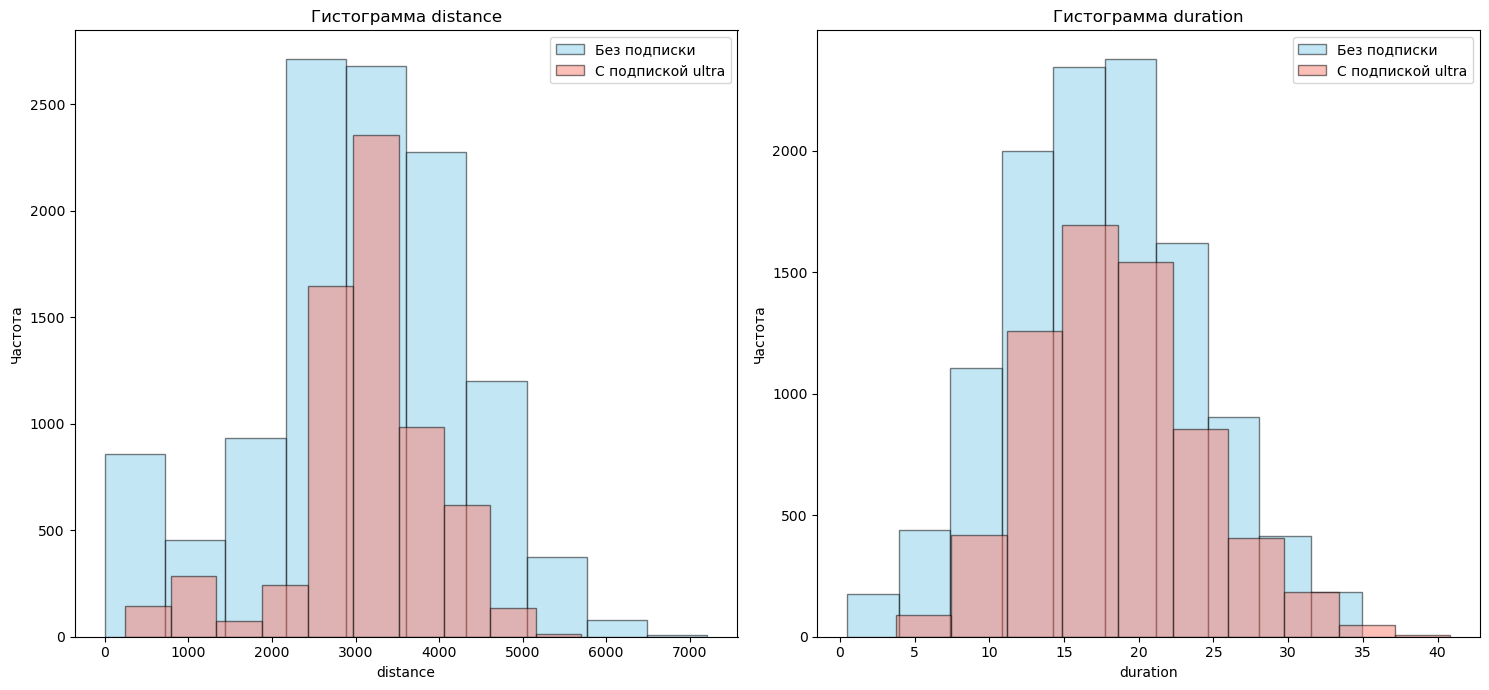

In [29]:
def plot_histograms(df1, df2, column1, column2, title1, title2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    
    # Построение гистограммы для column1
    axs[0].hist(df1[column1], bins=10, color='skyblue', edgecolor='black', alpha=0.5, label=title1)
    axs[0].hist(df2[column1], bins=10, color='salmon', edgecolor='black', alpha=0.5, label=title2)
    axs[0].set_ylabel('Частота')
    axs[0].set_xlabel(column1)
    axs[0].set_title('Гистограмма ' + column1)
    axs[0].legend(loc='upper right')
    
    # Построение гистограммы для column2
    axs[1].hist(df1[column2], bins=10, color='skyblue', edgecolor='black', alpha=0.5, label=title1)
    axs[1].hist(df2[column2], bins=10, color='salmon', edgecolor='black', alpha=0.5, label=title2)
    axs[1].set_xlabel(column2)
    axs[1].set_ylabel('Частота')
    axs[1].set_title('Гистограмма ' + column2)
    axs[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

plot_histograms(subscription_free, subscription_ultra, 'distance', 'duration',\
                'Без подписки', 'С подпиской ultra')

## Вывод

На данном этапе был создан объединенный датафрейм, содержащий данные о пользователях, поездках и подписках. На его основе было создано еще два датафрейма, содержащие информацию:

- о пользователях без подписки;
- о пользователях с подпиской.

Построены гистограммы, чтобы проанализировать, как отличается расстояние и продолжительность поездки для пользователей с различным типом подписки. 

На гистограммах видно, что пользователи без подписки (free) за поездку преодолевают расстояние от 0 до 7000 метров, пик значений приходится на 2500-3500 метров; продолжительность поездки составляет от 0 до 35 минут, большиство поездок находятся в диапазоне от 15 до 20 минут. 
Пользователи с подпиской ultra за поездку преодолевают расстояние от 0 до 6000 метров, пик значений приходится на 2500 метров; продолжительность поездки составляет от 3 до 40 минут, большиство поездок находятся в диапазоне от 15 до 20 минут.
Таким образом, пользователи без подписки за поездку преодолевают большее расстояние, а сами поездки имеют большую продолжительность. На гистограмме "Статистика поездок пользователей с подпиской ultra" также можно отметить, что много поездок имеют дистанцию до 2500 метров и небольшую продолжительность — до 10 минут. Это может быть связано с тем, что для подписчиков ultra старт поездки бесплатный. 

# Подсчёт выручки
**Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**


Для корректного подсчета выручки сначала округлим до целых минут продолжительность поездки в датафрейме `df`

## Создаем датафрейм с агрегированными данными

Так как оплата поездки производится с округлением до целой минуты вверх, добавим в датафрейм df столбец duration_ceil с окгругленными значениями продолжительности поездки для корректного расчета выручки.

In [30]:
df['duration_ceil'] = np.ceil(df['duration']).astype('int64') 

Создаем сводную таблицу с суммарным расстоянием, количеством поездок и суммарным времем для каждого пользователя за каждый месяц.

In [31]:
revenue_data = df.pivot_table(index=['user_id', 'subscription_type',
                                     'month', 'minute_price', 'start_ride_price', 
                                     'subscription_fee'], 
                              values=['distance', 'duration_ceil'], 
                              aggfunc={'distance': ['sum', 'count'], 'duration_ceil': 'sum'})


In [32]:
# устраним двухуровневые названия столбцов

revenue_data.columns = ['_'.join(col).replace(' ', '_') for col in revenue_data.columns.values] 

In [33]:
revenue_data.rename(columns={ # переименуем столбцы
    'distance_count': 'num_rides',
    'distance_sum': 'total_distance',
    'duration_ceil_sum': 'total_duration'
}, inplace=True)
revenue_data.reset_index(inplace=True)
revenue_data

,user_id,subscription_type,month,minute_price,start_ride_price,subscription_fee,num_rides,total_distance,total_duration
0,1,ultra,1,6,0,199,2,7027.511294,42
1,1,ultra,4,6,0,199,1,754.159807,7
2,1,ultra,8,6,0,199,2,6723.470560,46
3,1,ultra,10,6,0,199,2,5809.911100,32
4,1,ultra,11,6,0,199,3,7003.499363,56
...,...,...,...,...,...,...,...,...,...
11326,1534,free,6,8,50,0,2,3409.468534,26
11327,1534,free,8,8,50,0,2,7622.453034,48
11328,1534,free,9,8,50,0,1,4928.173852,23
11329,1534,free,11,8,50,0,4,13350.015305,78


## Добавляем столбец с помесячной выручкой

В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [34]:
revenue_data = revenue_data.assign(month_revenue = revenue_data['minute_price']
                                   * revenue_data['total_duration'] +
                                   revenue_data['start_ride_price'] 
                                   * revenue_data['num_rides'] + 
                                   revenue_data['subscription_fee'])

# проверяем результат
revenue_data[['user_id', 'month', 'subscription_type', 'month_revenue']]

,user_id,month,subscription_type,month_revenue
0,1,1,ultra,451
1,1,4,ultra,241
2,1,8,ultra,475
3,1,10,ultra,391
4,1,11,ultra,535
...,...,...,...,...
11326,1534,6,free,308
11327,1534,8,free,484
11328,1534,9,free,234
11329,1534,11,free,824


На данном этапе был создан датафрейм с агрегированными данными, содержащими суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В датафрейм добавили столбец с помесячной выручкой, которую принес каждый пользователь, с учетом подписки. Этот столбец пригодится нам на следующем этапе для проверки гипотез.

# Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

## гипотеза 1 

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


Нулевая гипотеза (H0): Средняя продолжительность поездок пользователей с подпиской ultra равна средней продолжительности поездок пользователей без подписки. Это означает, что нет статистически значимых различий между этими двумя группами.

Альтернативная гипотеза (H1): Средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки. Это означает, что есть статистически значимые различия между этими двуми группами.

Для проверки гипотезы используем статистический тест для проверки гипотезы о равенстве средних двух генеральных совокупностей, метод `scipy.stats.ttest_ind()`.

In [35]:
# задаём уровень значимости
alpha = 0.05

# продолжительность поездки первой группы пользователей (с подпиской)
first_group_total = subscription_ultra['duration']
# продолжительность поездки второй группы пользователей (без подписки)
second_group_total = subscription_free['duration']
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Выведем среднюю продолжительность поездки для пользователей с различными типами подписки.

In [36]:
print('Средняя продолжительность поездки для пользователей с подпиской ultra составляет:',\
     round(first_group_total.mean(), 2), 'минут')
print('Средняя продолжительность поездки для пользователей без подписки составляет:',\
     round(second_group_total.mean(), 2), 'минут')

Средняя продолжительность поездки для пользователей с подпиской ultra составляет: 18.54 минут
Средняя продолжительность поездки для пользователей без подписки составляет: 17.39 минут


p-value оказалось меньше уровня значимости, поэтому мы отвергли нулевую гипотезу в пользу альтернативной, что означает, что существуют статистически значимые различия между продолжительностью поездок пользователей с разными подписками. Альтернативная гипотеза не отвергается: средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки. Это означает, что есть статистически значимые различия между этими двуми группами.

## гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.



Нулевая гипотеза (H0): Расстояние одной поездки пользователей с подпиской ultra не превышает 3130 метров.

Альтернативная гипотеза (H1): Расстояние одной поездки пользователей с подпиской ultra больше 3130 метров.

Для проверки гипотезы будем использовать односторонний статистический тест, метод `scipy.stats.ttest_1samp()`.

In [37]:
# задаём уровень значимости
alpha = 0.05
distance_ultra = df[df['subscription_type'] == 'ultra']['distance']
interested_value = 3130
results = st.ttest_1samp(distance_ultra, interested_value, alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value превышает установленный уровень значимости. Это означает, что у нас нет достаточных оснований для отвержения нулевой гипотезы. Таким образом, результат теста показывает, что среднее расстояние, которое проезжают пользователи с подпиской ultra за одну поездку, не превышает 3130 метров.

## гипотеза 3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод. 


Нулевая гипотеза (H0): Помесячная выручка от пользователей с подпиской ultra равна выручке от пользователей без подписки. Это означает, что нет статистически значимых различий между этими двумя группами.

Альтернативная гипотеза (H1): Помесячная выручка от пользователей с подпиской ultra больше, чем  выручка от пользователей без подписки (free). Это означает, что есть статистически значимые различия между этими двуми группами.

Для проверки гипотезы используем статистический тест для проверки гипотезы о равенстве средних двух генеральных совокупностей, метод `scipy.stats.ttest_ind()` с односторонней альтернативой "greater".

In [38]:
alpha = 0.05 # задаём уровень значимости
revenue_ultra = revenue_data[revenue_data['subscription_type'] == 'ultra']['month_revenue']
revenue_free = revenue_data[revenue_data['subscription_type'] == 'free']['month_revenue']

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Выведем среднюю помесячную выручку пользователей с различными типами подписки. 

In [39]:
print('Средняя помесячная выручка пользователей с подпиской ultra составляет:',\
     round(revenue_ultra.mean(), 2), 'рублей')
print('Средняя помесячная выручка пользователей без подписки составляет:',\
     round(revenue_free.mean(), 2), 'рублей')

Средняя помесячная выручка пользователей с подпиской ultra составляет: 362.79 рублей
Средняя помесячная выручка пользователей без подписки составляет: 328.64 рублей


Полученное значение p-value меньше уровня значимости α=0.05. Это означает, что мы отвергаем нулевую гипотезу в пользу альтернативной. То есть, средняя помесячная выручка от пользователей с подпиской ultra статистически значимо больше средней помесячной выручки от пользователей без подписки (free).

## теоретический вопрос

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае воспользуемся методом `scipy.stats.ttest_rel()` для проверки гипотез о равенстве средних для зависимых (парных) выборок. Он подходит для ситуаций, когда необходимо анализировать одну генеральную совокупность, с которой произошли некоторые изменения: проверяется, равны ли средние совокупности до и после этого изменения.

# Распределения

## акция с раздачей промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.


In [40]:
p = 0.1  # вероятность продления подписки
target = 100  # целевое количество продлений подписки
alpha = 0.05  # вероятность не выполнить план

# начинаем с некоторого начального значения n
n = target

# увеличиваем n, пока вероятность получить меньше target "успехов" не станет меньше alpha
while binom.cdf(target, n, p) > alpha:
    n += 1

print(f'Минимальное количество промокодов, которое нужно разослать: {n}')

Минимальное количество промокодов, которое нужно разослать: 1172


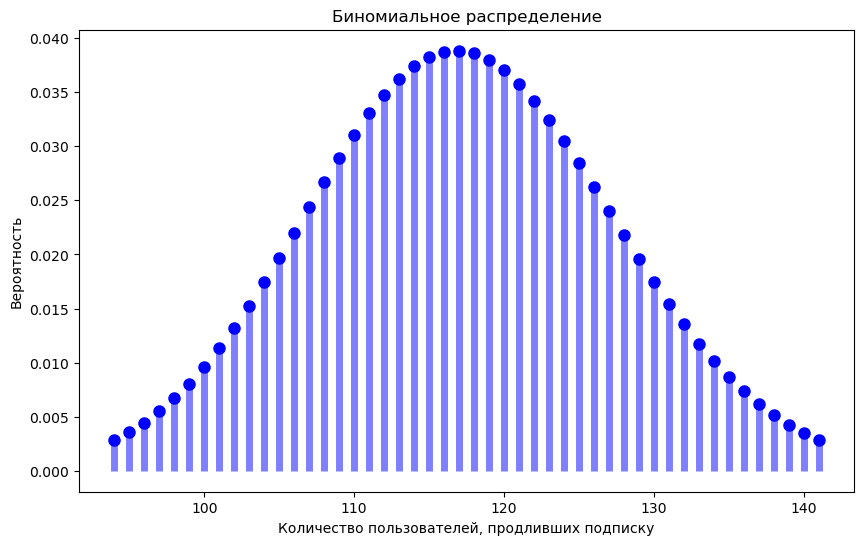

In [41]:
# значения на оси x
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

# строим график pmf
plt.figure(figsize=(10,6))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Количество пользователей, продливших подписку')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.show()

## рассылка клиентам push-уведомлений

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

In [42]:
# параметры распределения
n = 1000000  # количество уведомлений
p = 0.4  # вероятность открытия уведомления

# параметры нормального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# значение, которое мы проверяем
x = 399500

# вычисляем вероятность получить не более x "успехов"
prob = norm.cdf(x, mu, sigma)

print(f'Вероятность, что уведомление откроют не более {x} пользователей: ', round(prob, 2) * 100, '%')

Вероятность, что уведомление откроют не более 399500 пользователей:  15.0 %


**Вывод**

Для успешного проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, нужно разослать как минимум 1172 промокодов. 

При рассылке клиентам 1 млн push-уведомлений в мобильном приложении вероятность, что уведомление откроют не более 399500 пользователей составяет 15 %. 

# Общий вывод

В ходе работы над проектом были проанализированы данные о некоторых пользователях сервиса аренды самокатов GoFast, проверено 3 гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 


**Для проведения исследования нам представлено 3 датафрейма, которые содержат информацию о:**

- пользователях сервиса `users_go.csv`. Не содержит пропусков и имеет 31 дублирующуюся строку. Дубликаты на этапе предобработки данных были удалены. 
- поездках `rides_go.csv`. Не содержит пропусков и дубликатов. На этапе предварительной обработки данных тип данных столбца date  приведен к datetime64 для удобства дальнейшей работы. 
- подписках `subscriptions_go.csv`. Пропусков и дубликатов нет. 

На этапе исследовательского анализа данных мы познакомились с данными о пользователях сервиса проката самокатов и совершенных поездках. 

**О пользователях:**
Наибольшей популярностью в представленной выборке сервис пользуется в Пятигорске и Екатеринбурге — зарегистрировано более 200 пользователей из этих городов. 45.6 % пользователей сервиса имеют платную подписку, 54.4 % пользователей сервиса пользуются бесплатной версией (без подписки). В  основном пользователями сервиса являются молодые люди в возрасте от 22 до 28 лет. Необычными являются значения больше 36 и меньше 13 лет.

**О поездках:**
Расстояние поездок варьируется от 0 до 7000 метров. Большинство поездок находятся в диапазоне от 2000 до 4000 м, с пиком около 3000 м. Это означает, что наиболее часто встречающееся расстояние, которое пользователи преодолевают за одну поездку на самокате, составляет около 3000 м. Также наблюдается дополнительный пик в районе 600 м. Это может указывать на некоторое количество непродолжительных поездок. Возможно, это может быть связано с обнаруженной после старта поездки неисправностью самоката, а, возможно, непродолжительные поездки также пользуются спросом пользователей сервиса.

Продолжительность поездок варьируется от 0 до 40 минут. Большинство поездок находятся в диапазоне от примерно 15 до 25 минут. Это означает, что наиболее часто встречающаяся продолжительность поездки на самокате составляет около 20 минут. Также присутствует всплеск в районе 1 минуты. В данных присутствует информация о поездках продолжительностью менее 1 минуты, однако за это время было преодолено расстояние в несколько тысяч метров, что выглядит как артефакт. Возможно, это связано с ошибкой при сборе данных. Всего в данных имеется 95 таких строк, оставили без изменений, так как в дальнейшем при подсчете выручки удаление этих данных исказит результат исследования. Об артефакте в данных необходимо сообщить заказчику.

**Различия в поведении пользователей с подпиской ultra и без подписки**

- Для сравнения поведения пользователей были построены гистограммы. Пользователи без подписки (free) за поездку преодолевают расстояние от 0 до 7000 метров, пик значений приходится на 2500-3500 метров; продолжительность поездки составляет от 0 до 35 минут, большиство поездок находятся в диапазоне от 15 до 20 минут. 

- Пользователи с подпиской ultra за поездку преодолевают расстояние от 0 до 6000 метров, пик значений приходится на 2500 метров; продолжительность поездки составляет от 3 до 40 минут, большиство поездок находятся в диапазоне от 15 до 20 минут.
Таким образом, пользователи без подписки за поездку преодолевают большее расстояние, а сами поездки имеют большую продолжительность. Также можно отметить, что много поездок имеют дистанцию до 2500 метров и небольшую продолжительность — до 10 минут. Это может быть связано с тем, что для подписчиков ultra старт поездки бесплатный. 

Для проверки гипотез был создан датафрейм revenue_data с агрегированными данными о продолжительности, расстоянии и количестве поездок для каждого пользователя в месяц. Также посчитали помесячную выручку, которую принес каждый пользователь, с учетом наличия или отсутствия подписки. 
Было проверено несколько гипотез, из них не были отвергнуты следующие:
1. *тратят ли пользователи с подпиской больше времени на поездки*\
Средняя продолжительность поездок пользователей с подпиской ultra больше средней продолжительности поездок пользователей без подписки. В ходе анализа продолжительности поездок пользователей с разными типами подписки мы обнаружили, что на гистограмме продолжительности видно, что пользователи без подписки совершают более длительные поездки. Однако стоит учитывать, что результаты статистических тестов могут быть влиянием случайности и других факторов. Объем выборки и контекст задачи также играют важную роль в интерпретации результатов.\
Средняя продолжительность поездки для пользователей с подпиской ultra составляет 18.54 минут, без подписки — 17.39 минут.

2. *расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров*\
Расстояние одной поездки пользователей с подпиской ultra не превышает 3130 метров.

3. *помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки*\
Помесячная выручка от пользователей с подпиской ultra больше, чем выручка от пользователей без подписки (free).\
Средняя помесячная выручка пользователей с подпиской ultra составляет 362.79 рублей, без подписки — 328.64 рублей.


Для успешного проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, нужно разослать как минимум 1172 промокодов. 

При рассылке клиентам 1 млн push-уведомлений в мобильном приложении вероятность, что уведомление откроют не более 399500 пользователей составяет 15 %. 